In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv('loan_prediction.csv')

-------------------------------------------------------------------------------------------------------------------------------

### Data Exploration

In [3]:
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
loan.shape

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


-------------------------------------------------------------------------------------------------------------------------------

### Preprocessing

#### Handling missing values

In [6]:
print(loan['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


Solution based on this resource, randomly filling the missing data:
*https://stackoverflow.com/questions/64485812/how-to-generate-random-categorical-data-from-existing-ones-to-fill-missing-value

The decision was made on the assumption that data is very sensible to imputation, and even more to delete it, was made as an arbitrary decision, havent documented about it

In [7]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=0)

    # This ensures our new values will replace NaNs in the correct locations
    fill_values.index = series.index[na_mask]
    
    return series.fillna(fill_values) 

In [8]:
loan["Gender"] = na_randomfill(loan["Gender"])

In [9]:
loan["Gender"].value_counts()

Male      499
Female    115
Name: Gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

In [10]:
loan[['Married']] = loan[['Married']].fillna('No')

-------------------------------------------------------------------------------------------------------------------------------

In [11]:
print(loan['Dependents'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [12]:
loan["Dependents"] = na_randomfill(loan["Dependents"])

In [13]:
print(loan['Dependents'].value_counts())

0     350
2     106
1     105
3+     53
Name: Dependents, dtype: int64


In [14]:
loan["Dependents"].replace({"3+": "3"}, inplace=True)

In [15]:
print(loan['Dependents'].value_counts())

0    350
2    106
1    105
3     53
Name: Dependents, dtype: int64


In [16]:
loan['Dependents'] = pd.to_numeric(loan["Dependents"], downcast="float")

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float32
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float32(1), float64(4), int64(1), object(7)
memory usage: 60.1+ KB


-------------------------------------------------------------------------------------------------------------------------------

In [18]:
print(loan['Self_Employed'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [19]:
loan[['Self_Employed']] = loan[['Self_Employed']].fillna('No')

-------------------------------------------------------------------------------------------------------------------------------

In [20]:
loan['LoanAmount'].fillna((loan['LoanAmount'].mean()), inplace=True)

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float32
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float32(1), float64(4), int64(1), object(7)
memory usage: 60.1+ KB


In [22]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
print(loan['Loan_Amount_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [24]:
loan["Loan_Amount_Term"] = na_randomfill(loan["Loan_Amount_Term"])

In [25]:
print(loan['Loan_Amount_Term'].value_counts())

360.0    522
180.0     44
480.0     18
300.0     14
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


-------------------------------------------------------------------------------------------------------------------------------

In [26]:
loan[['Credit_History']] = loan[['Credit_History']].fillna(0.0)

-------------------------------------------------------------------------------------------------------------------------------

In [27]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


-------------------------------------------------------------------------------------------------------------------------------

#### Data encoding for categorical variables

In [28]:
loan['Loan_ID'].nunique()

614

In [29]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [30]:
loan["Gender"].replace({"Male": 1, "Female": 0}, inplace=True)

In [31]:
loan["Married"].replace({"Yes": 1, "No": 0}, inplace=True)

In [32]:
loan["Education"].replace({"Graduate": 1, "Not Graduate": 0}, inplace=True)

In [33]:
loan["Self_Employed"].replace({"Yes": 1, "No": 0}, inplace=True)

In [34]:
loan["Property_Area"].replace({"Urban": 3, "Semiurban": 2, "Rural": 1}, inplace=True)

In [35]:
loan['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [36]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float32
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float32(1), float64(4), int64(6), object(2)
memory usage: 60.1+ KB


In [37]:
loan["Loan_Status"].replace({"Y": 1, "N": 0}, inplace=True)

In [38]:
last_column =loan.pop('Loan_Status')
loan.insert(12, 'Loan_Status', last_column)

In [39]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,3,1
612,LP002984,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,3,1


-------------------------------------------------------------------------------------------------------------------------------

In [40]:
loan1 = loan.drop('Loan_ID', axis=1)

In [41]:
loan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,3,1
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,3,1
612,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,3,1


In [42]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float32
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float32(1), float64(4), int64(7)
memory usage: 55.3 KB


In [43]:
X= loan1.iloc[:,:-1]

In [44]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,3
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,3
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,3
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,1
611,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,3
612,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,3


In [45]:
y = loan1.iloc[:,-1]

In [46]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [48]:
validation_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [49]:
print(X_train.shape)

(491, 11)


In [50]:
print(X_test.shape)

(123, 11)


In [51]:
print(y_train.shape)

(491,)


In [52]:
print(y_test)

220    0
109    1
569    0
330    1
407    1
      ..
23     0
323    1
344    1
232    1
244    1
Name: Loan_Status, Length: 123, dtype: int64


In [53]:
from matplotlib import pyplot as plt

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

********************************************************************************************************************************

The following sections were heavily inspired on this resource: https://www.kaggle.com/code/richarde/easy-pipeline-and-model-selection/notebook

In [55]:
#evaluation - baselines
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

LR 0.745347 0.060266 
KNN 0.621143 0.056611 
CART 0.637347 0.075637 
SVM 0.686531 0.064169 


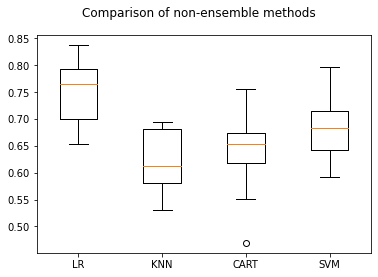

In [56]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of non-ensemble methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

Logistic REgression model have the best performance overall with a considerable margin, so lets proceed with hiperparameter optimization and feature selection

********************************************************************************************************************************

The following sections were heavily inspired in this resource: https://www.kaggle.com/code/vinicius150987/logistic-regression-rfe/notebook

In [63]:
classifier = LogisticRegression(random_state=0, penalty='l2')

In [64]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
#Predicting Test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.813008,0.814433,0.940476,0.872928


Test Data Accuracy: 0.8130


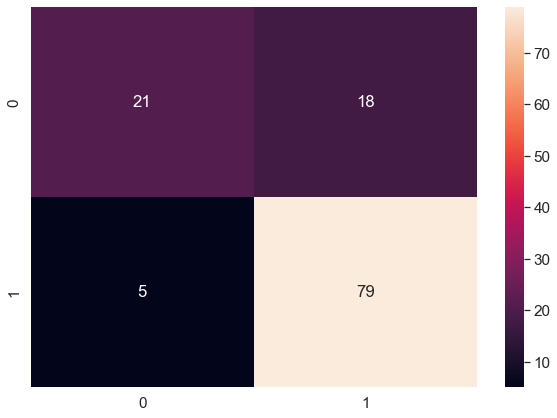

In [66]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

In [67]:
#Plotting Cumulative Accuracy Profile (CAP)
y_pred_prob = classifier.predict_proba(X_test)
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    

      0         1
0   1.0  0.897024
1   0.0  0.893652
2   1.0  0.873515
3   1.0  0.863570
4   1.0  0.859273
5   1.0  0.857742
6   1.0  0.853050
7   1.0  0.852775
8   1.0  0.851940
9   1.0  0.851086
10  1.0  0.848150
11  1.0  0.846443
12  0.0  0.845686
13  1.0  0.844857
14  1.0  0.844206
15  0.0  0.843912
16  1.0  0.842686
17  0.0  0.840111
18  1.0  0.837814
19  1.0  0.834686


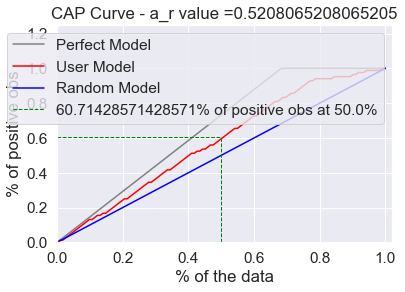

In [68]:
capcurve(y_test,y_pred_prob[:,1])

In [69]:
#Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Logistic Regression (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Logistic Regression (Lasso) Accuracy: 0.745 (+/- 0.062)


C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [70]:
#Analyzing the coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,Gender,0.022373
1,Married,0.456182
2,Dependents,-0.024912
3,Education,0.460367
4,Self_Employed,-0.058738
5,ApplicantIncome,-0.000007
6,CoapplicantIncome,-0.000056
7,LoanAmount,-0.001553
8,Loan_Amount_Term,-0.002855
9,Credit_History,1.757862


********************************************************************************************************************************

In [71]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True False  True False False False False False  True  True]
[1 1 3 1 2 7 6 4 5 1 1]


C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Index(['Gender', 'Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object')

C:\Users\Usuario\AppData\Local\Temp/ipykernel_12648/1203977895.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

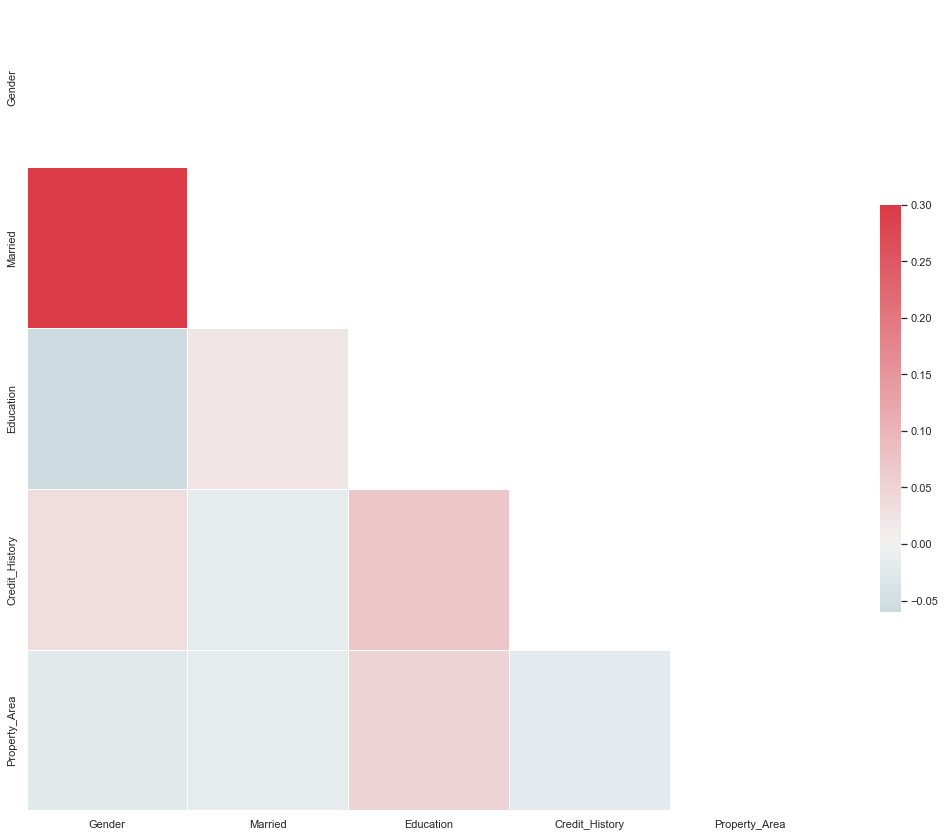

In [72]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  

********************************************************************************************************************************

In [74]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty= 'l2')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.813008,0.814433,0.940476,0.872928
1,Logistic Regression RFE (Lasso),0.813008,0.821053,0.928571,0.871508


      0         1
0   1.0  0.875312
1   1.0  0.863762
2   1.0  0.837421
3   1.0  0.837421
4   1.0  0.837421
5   1.0  0.837421
6   1.0  0.837421
7   1.0  0.837421
8   0.0  0.837421
9   1.0  0.837421
10  1.0  0.837421
11  1.0  0.837421
12  1.0  0.837421
13  1.0  0.837421
14  1.0  0.823070
15  1.0  0.823070
16  1.0  0.823070
17  1.0  0.823070
18  1.0  0.823070
19  1.0  0.823070


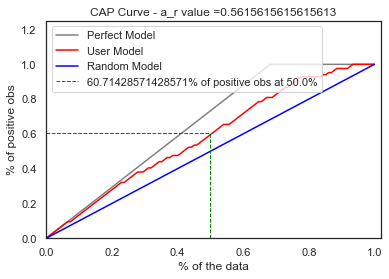

In [75]:
y_pred_prob = classifier.predict_proba(X_test[X_train.columns[rfe.support_]])
capcurve(y_test,y_pred_prob[:,1])